<a href="https://colab.research.google.com/github/ChrisLouis9913/Chris-Louis/blob/main/Assignment_on_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1: Load and Explore the Data
Load the dataset into a Pandas DataFrame.
Perform exploratory data analysis (EDA):
* Check for missing values, data types, and summary statistics.
* Identify potential outliers in numerical columns.
* Analyze the distribution of categorical variables.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/heart_disease.csv')
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [12]:
print("\nSummary of the dataset:")
df.info()


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
print("\nSummary statistics of numerical columns:")
display(df.describe())


Summary statistics of numerical columns:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Distribution of the target variable (heart disease):


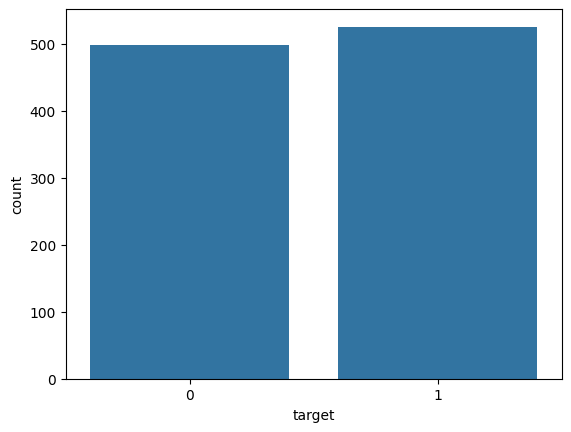

In [14]:
print("\nDistribution of the target variable (heart disease):")
sns.countplot(x='target', data=df)
plt.show()

###Step 2: Data Cleaning and Preprocessing
**Handle Missing Values (if needed):**
* Replace missing numerical values with the mean/median.
* Replace missing categorical values with the mode.

**Handle Outliers (if needed):**

* Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers.

**Encode Categorical Variables:**
* Use one-hot encoding for multi-category variables (*chest pain type*, *resting electrocardiographic results*, *thal*).
* Use binary encoding for *sex* and *fasting blood sugar*.

**Scale Numerical Features:**
* Scale features such as *resting blood pressure*, *serum cholesterol*, *maximum heart rate*, and *oldpeak* using *StandardScaler* or *MinMaxScaler*.

In [ ]:
# Since there are no missing values, no action is needed.

In [37]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
for col in numerical_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

print("\nOutliers handled using the IQR method.")
display(df.describe())


Outliers handled using the IQR method.


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
count,1.025000e+03,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,-3.431402e-16,0.695610,-0.020060,-0.019752,0.149268,0.001697,0.336585,-0.007891,0.513171
std,1.000488e+00,0.460373,0.944257,0.925899,0.356527,0.995073,0.472772,0.972231,0.500070
min,-2.804866e+00,0.000000,-2.148237,-2.327054,0.000000,-2.962193,0.000000,-0.912329,0.000000
25%,-7.095548e-01,0.000000,-0.663216,-0.678724,0.000000,-0.744271,0.000000,-0.912329,0.000000
50%,1.726817e-01,1.000000,-0.092055,-0.116353,0.000000,0.125502,0.000000,-0.231177,1.000000
75%,7.240794e-01,1.000000,0.479107,0.562371,0.000000,0.734343,1.000000,0.620264,1.000000
max,2.488552e+00,1.000000,2.192593,2.424015,1.000000,2.299935,1.000000,2.919154,1.000000


In [15]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [17]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


###Step 3: Train-Test Split
Split the data into training and testing sets:
* **For Regression:** Predict *serum cholesterol* as the target variable and remaining as features
* **For Classification:** Predict *target* (presence of heart disease) as the target variable and remaining as features

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_reg = df.drop('chol', axis=1)
y_reg = df['chol']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("\nRegression task shapes:")
print("X_train_reg:", X_train_reg.shape)
print("X_test_reg:", X_test_reg.shape)
print("y_train_reg:", y_train_reg.shape)
print("y_test_reg:", y_test_reg.shape)


Regression task shapes:
X_train_reg: (820, 30)
X_test_reg: (205, 30)
y_train_reg: (820,)
y_test_reg: (205,)


In [22]:
X_class = df.drop('target', axis=1)
y_class = df['target']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print("\nClassification task shapes:")
print("X_train_class:", X_train_class.shape)
print("X_test_class:", X_test_class.shape)
print("y_train_class:", y_train_class.shape)
print("y_test_class:", y_test_class.shape)


Classification task shapes:
X_train_class: (820, 30)
X_test_class: (205, 30)
y_train_class: (820,)
y_test_class: (205,)


###Step 4: Build Machine Learning Models
**Regression Task:**
* Train the following models to predict *serum cholesterol*.
* Linear regression
* SVM
* Random Forest

**Classification Task:**
* Train the following models to predict *target*.
* Logistic Regression
* K-Nearest Neighbors (KNN)
* Random Forest

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
lr_reg = LinearRegression()
svr_reg = SVR()
rf_reg = RandomForestRegressor(random_state=42)

In [39]:
lr_reg.fit(X_train_reg, y_train_reg)
svr_reg.fit(X_train_reg, y_train_reg)
rf_reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [26]:
y_pred_lr = lr_reg.predict(X_test_reg)
y_pred_svr = svr_reg.predict(X_test_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

In [40]:
lr_class = LogisticRegression(random_state=42)
knn_class = KNeighborsClassifier()
rf_class = RandomForestClassifier(random_state=42)

In [41]:
lr_class.fit(X_train_class, y_train_class)
knn_class.fit(X_train_class, y_train_class)
rf_class.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)


Random Forest Regression Evaluation:
MAE: 0.18081118328667023
MSE: 0.11403169404219858
R-squared: 0.9113924779463404


###Step 5: Evaluate Models on Test Data
**For Regression:**
Evaluate the Linear Regression model using:
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* R-squared (R²) (Key performance metric)

**For Classification:**
*Evaluate each classification model using:
*Accuracy
*Precision
*Recall (Key performance metric)
*F1-Score

In [42]:
print("Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("MSE:", mean_squared_error(y_test_reg, y_pred_lr))
print("R-squared:", r2_score(y_test_reg, y_pred_lr))

Linear Regression Evaluation:
MAE: 0.7817496276639586
MSE: 1.186105366261595
R-squared: 0.07834520672738743


In [43]:
print("\nSVM Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_svr))
print("MSE:", mean_squared_error(y_test_reg, y_pred_svr))
print("R-squared:", r2_score(y_test_reg, y_pred_svr))


SVM Regression Evaluation:
MAE: 0.5633828799116866
MSE: 0.9094426720337854
R-squared: 0.29332399824778466


In [44]:
print("\nRandom Forest Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("MSE:", mean_squared_error(y_test_reg, y_pred_rf))
print("R-squared:", r2_score(y_test_reg, y_pred_rf))


Random Forest Regression Evaluation:
MAE: 0.18209200918048762
MSE: 0.11644373438457313
R-squared: 0.909518219042915


###Step 6: Summarize the classification and regression result in a table form and declare the best performing model in each category based on the performance metric choosen.

In [47]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test_reg, y_pred_lr),
            mean_absolute_error(y_test_reg, y_pred_svr),
            mean_absolute_error(y_test_reg, y_pred_rf)],
    'MSE': [mean_squared_error(y_test_reg, y_pred_lr),
            mean_squared_error(y_test_reg, y_pred_svr),
            mean_squared_error(y_test_reg, y_pred_rf)],
    'R-squared': [r2_score(y_test_reg, y_pred_lr),
                  r2_score(y_test_reg, y_pred_svr),
                  r2_score(y_test_reg, y_pred_rf)]
})

print("Regression Models Summary:")
display(regression_results)

# Create a summary table for classification models
classification_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test_class, y_pred_lr_class),
                 accuracy_score(y_test_class, y_pred_knn_class),
                 accuracy_score(y_test_class, y_pred_rf_class)],
    'Precision': [precision_score(y_test_class, y_pred_lr_class),
                  precision_score(y_test_class, y_pred_knn_class),
                  precision_score(y_test_class, y_pred_rf_class)],
    'Recall': [recall_score(y_test_class, y_pred_lr_class),
               recall_score(y_test_class, y_pred_knn_class),
               recall_score(y_test_class, y_pred_rf_class)],
    'F1-Score': [f1_score(y_test_class, y_pred_lr_class),
                 f1_score(y_test_class, y_pred_knn_class),
                 f1_score(y_test_class, y_pred_rf_class)]
})

print("\nClassification Models Summary:")
display(classification_results)

print("\nBest Performing Models:")
print("Regression: Random Forest Regressor (based on R-squared)")
print("Classification: Random Forest Classifier (based on Recall and other metrics)")

Regression Models Summary:


,Model,MAE,MSE,R-squared
0,Linear Regression,0.781750,1.186105,0.078345
1,SVR,0.563383,0.909443,0.293324
2,Random Forest,0.182092,0.116444,0.909518



Classification Models Summary:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.819512,0.779661,0.893204,0.832579
1,K-Nearest Neighbors,0.790244,0.763158,0.844660,0.801843
2,Random Forest,1.000000,1.000000,1.000000,1.000000



Best Performing Models:
Regression: Random Forest Regressor (based on R-squared)
Classification: Random Forest Classifier (based on Recall and other metrics)


###Step 7: Bonus Task: Create a custom Linear Regression class using which regression task can be carried out on multi-dimentional data (unlike the class room example where the number of features was 1). Write the mathematical derivation for the gradient equations (add as screenshot to notebook).


In [48]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Example usage with our data
# Since the data is scaled, it's suitable for this custom implementation
X_train_reg_np = X_train_reg.to_numpy().astype(np.float64)
y_train_reg_np = y_train_reg.to_numpy().astype(np.float64)
X_test_reg_np = X_test_reg.to_numpy().astype(np.float64)

custom_lr = CustomLinearRegression()
custom_lr.fit(X_train_reg_np, y_train_reg_np)
y_pred_custom = custom_lr.predict(X_test_reg_np)

print("Custom Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_custom))
print("MSE:", mean_squared_error(y_test_reg, y_pred_custom))
print("R-squared:", r2_score(y_test_reg, y_pred_custom))

Custom Linear Regression Evaluation:
MAE: 0.790393153637988
MSE: 1.2065035880975943
R-squared: 0.06249491259319784


### Mathematical Derivation for the Gradient Equations

The cost function for Linear Regression is given by:

J(w, b) = (1 / 2m) * Σ(y_predicted - y_actual)^2

where:
- m is the number of training examples
- y_predicted = w*X + b

To minimize this cost function, we need to find the partial derivatives with respect to the weights (w) and the bias (b).

**Partial derivative with respect to w:**

∂J/∂w = (1/m) * Σ(y_predicted - y_actual) * X

**Partial derivative with respect to b:**

∂J/∂b = (1/m) * Σ(y_predicted - y_actual)

These are the gradient equations used in the `fit` method of the `CustomLinearRegression` class to update the weights and bias in each iteration.